In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def estimate_mu(points):
    return (np.array(points).T.sum(axis=1) / len(points)).reshape(2, 1)

def estimate_cov(points, mu):
    sigma = np.zeros((2, 2))
    for i in range(len(points)):
        sigma = np.add(np.multiply((np.array(points[i]) - mu), (np.array(points[i]) - mu).reshape(2, 1)),  sigma)
    return sigma / len(points)

In [6]:
def likelihood(x, mu, cov):
    return (1 / np.sqrt(np.linalg.det(cov))) * (np.exp((-1/2) * np.dot(np.dot((x - mu).T, np.linalg.inv(cov)), (x - mu))))

def decision_boundary(x, mu1, cov1, mu2, cov2, priors=[0.5, 0.5], landa=np.array([[0,1],[1,0]])):
    risk_coeff = ((landa[0, 1] - landa[1, 1]) / (landa[1, 0] - landa[0, 0])) * (priors[1] / priors[0])
    return likelihood(x, mu1, cov1) - risk_coeff * likelihood(x, mu2, cov2)

In [7]:
def plot_points(points, marker='o', color='black'):
    for point in points:
        plt.scatter(point[0], point[1],marker=marker, color=color)

def plot_decision_boundary(x1, x2, mu1, mu2, cov1, cov2, priors=[0.5, 0.5], landa=np.array([[0,1],[1,0]])):
    x = np.linspace(-6, 4, 100)
    y = np.linspace(-6, 4, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(len(x)):
        for j in range(len(y)):
            Z[j, i] = decision_boundary(np.array([[X[j, i]], [Y[j, i]]]), mu1, cov1, mu2, cov2, priors, landa)

    plt.contourf(X, Y, Z, levels=[0,np.max(Z)], colors='green', alpha=0.3)
    plt.contour(X, Y, Z, levels=[0], colors='green')

    plot_points(x1, color='green')
    plot_points(x2, marker='X')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid()
    plt.title('Decision boundary')


In [8]:
x1 = [[0.5,0.5], [0.5,-0.5], [1.5,0.5], [1.5,-0.5], [1,-1], [-0.5,0.5], [-1,-1], [-2,0], [-2,1], [-2.5,-1]]
x2 = [[0,0.5], [1.5,0], [1,1], [0.5,2], [1.5,2], [2,1], [2.5,2], [1,3], [2,3]]

mu1 = estimate_mu(x1)
mu2 = estimate_mu(x2)

cov1 = estimate_cov(x1, mu1.T)
cov2 = estimate_cov(x2, mu2.T)

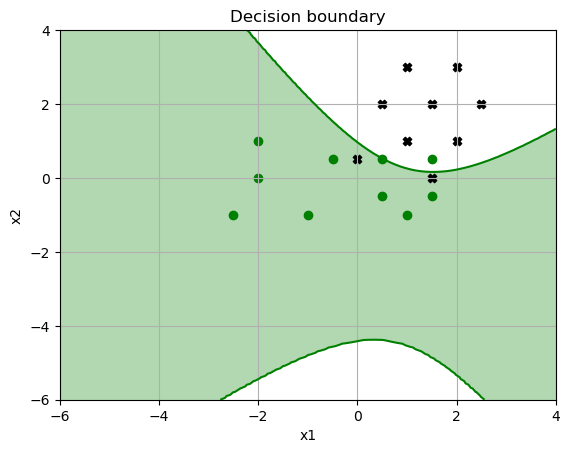

In [9]:
plot_decision_boundary(x1, x2, mu1, mu2, cov1, cov2)
plt.savefig('../assets/Q5_a.png')

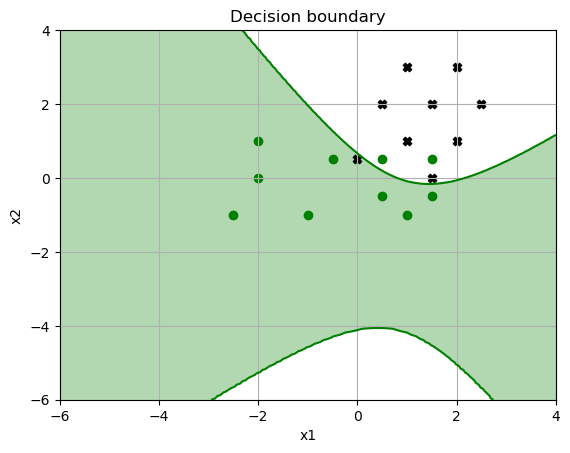

In [11]:
plot_decision_boundary(x1, x2, mu1, mu2, cov1, cov2, landa=np.array([[0, 2],[1, 0]]))
plt.savefig('../assets/Q5_b.png')

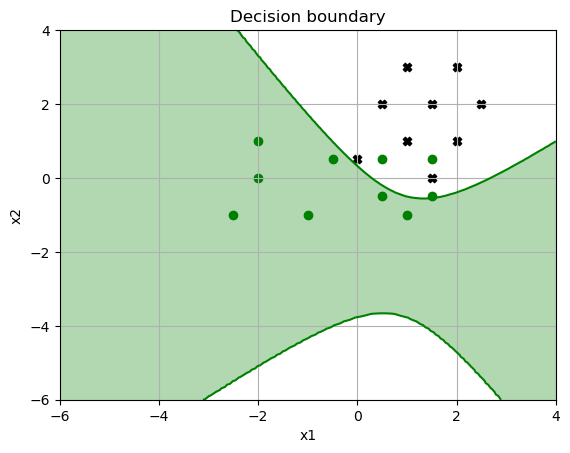

In [13]:
plot_decision_boundary(x1, x2, mu1, mu2, cov1, cov2, priors=[1/3, 2/3], landa=np.array([[0, 2],[1, 0]]))
plt.savefig('../assets/Q5_c.png')